# YouTube Streamer Analysis

### Reading youtubers dataset.

   Rank       Username           Categories   Suscribers         Country  \
0     1        tseries       Música y baile  249500000.0           India   
1     2        MrBeast   Videojuegos, Humor  183500000.0  Estados Unidos   
2     3      CoComelon            Educación  165500000.0         Unknown   
3     4       SETIndia                  NaN  162600000.0           India   
4     5  KidsDianaShow  Animación, Juguetes  113500000.0         Unknown   

        Visits      Likes  Comments  \
0      86200.0     2700.0      78.0   
1  117400000.0  5300000.0   18500.0   
2    7000000.0    24700.0       0.0   
3      15600.0      166.0       9.0   
4    3900000.0    12400.0       0.0   

                                               Links  
0  http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...  
1  http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...  
2  http://youtube.com/channel/UCbCmjCuTUZos6Inko4...  
3  http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...  
4  http://youtube.com/channel/UCk

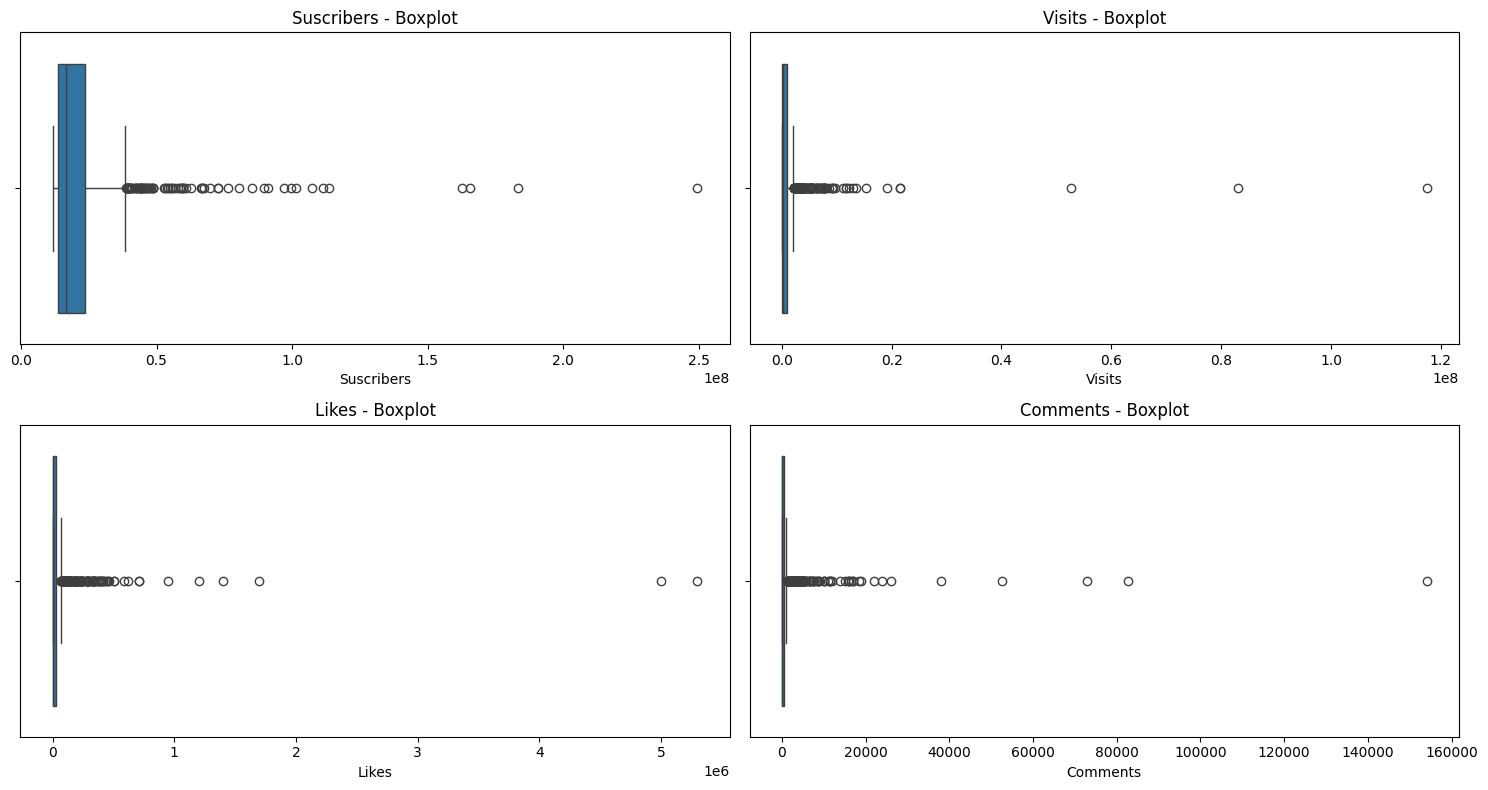

In [12]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data='youtubers_df.csv'
df = pd.read_csv(data)
# df.head()
# Display the first few rows of the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Get data types of each column
print(df.dtypes)

# Summary statistics
print(df.describe())

#Checking outliesrs and handling them
plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 1)
sns.boxplot(x=df['Suscribers'])
plt.title('Suscribers - Boxplot')

plt.subplot(2, 2, 2)
sns.boxplot(x=df['Visits'])
plt.title('Visits - Boxplot')

plt.subplot(2, 2, 3)
sns.boxplot(x=df['Likes'])
plt.title('Likes - Boxplot')

plt.subplot(2, 2, 4)
sns.boxplot(x=df['Comments'])
plt.title('Comments - Boxplot')

plt.tight_layout()
plt.show()


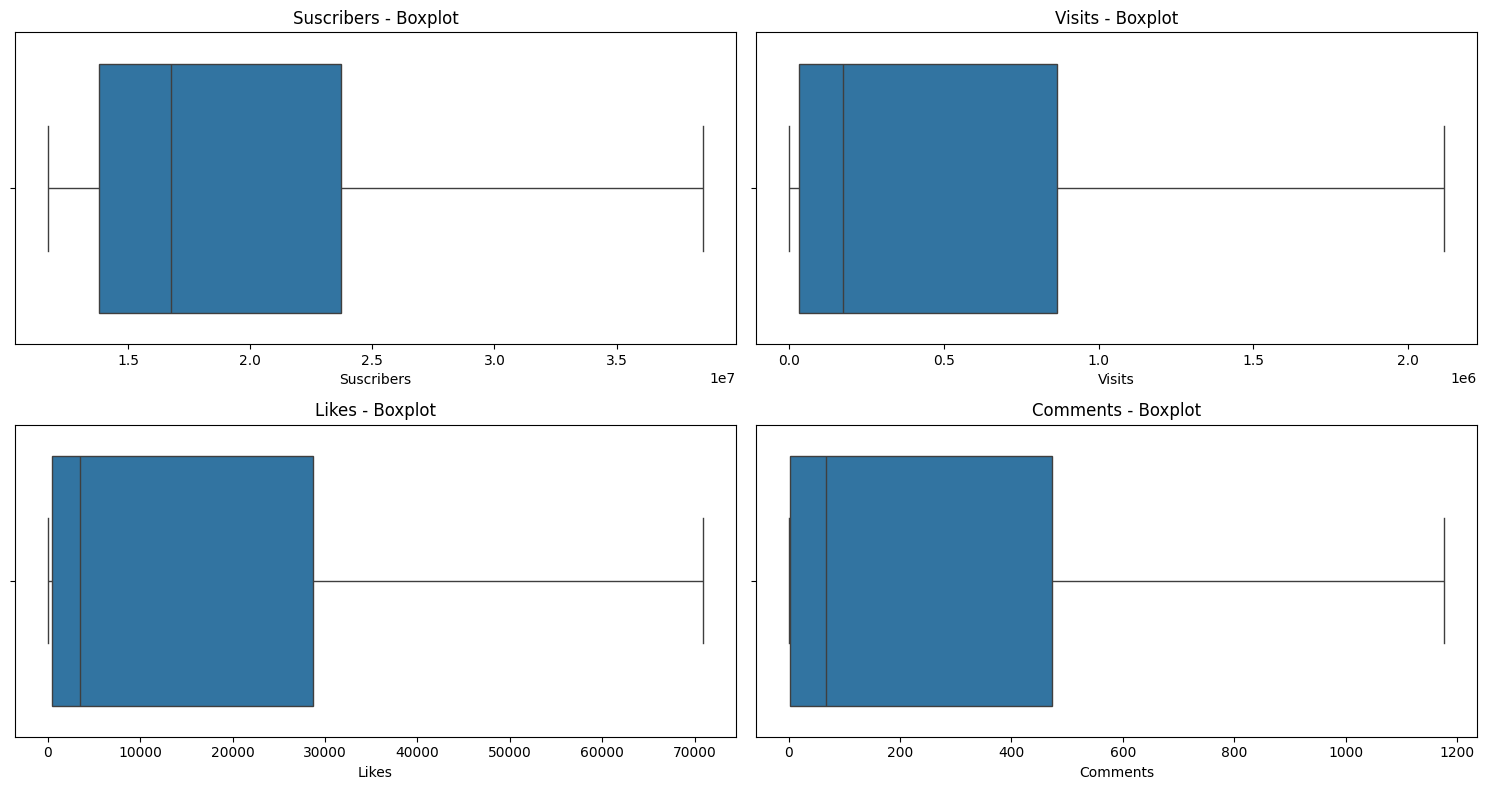

In [14]:
# Handling Outliers
# Check for outliers in key metrics (subscribers, visits, likes, comments)

# Handling outliers (you can customize this based on your analysis and goals)
def handle_outliers(column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df[column] = df[column].apply(lambda x: max(lower_bound, min(x, upper_bound)))

# Apply the outlier handling function to relevant columns
handle_outliers('Suscribers')
handle_outliers('Visits')
handle_outliers('Likes')
handle_outliers('Comments')

# Recheck the boxplots after handling outliers
plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 1)
sns.boxplot(x=df['Suscribers'])
plt.title('Suscribers - Boxplot')

plt.subplot(2, 2, 2)
sns.boxplot(x=df['Visits'])
plt.title('Visits - Boxplot')

plt.subplot(2, 2, 3)
sns.boxplot(x=df['Likes'])
plt.title('Likes - Boxplot')

plt.subplot(2, 2, 4)
sns.boxplot(x=df['Comments'])
plt.title('Comments - Boxplot')

plt.tight_layout()
plt.show()

### 2.Trend Analysis of Youtube streamers

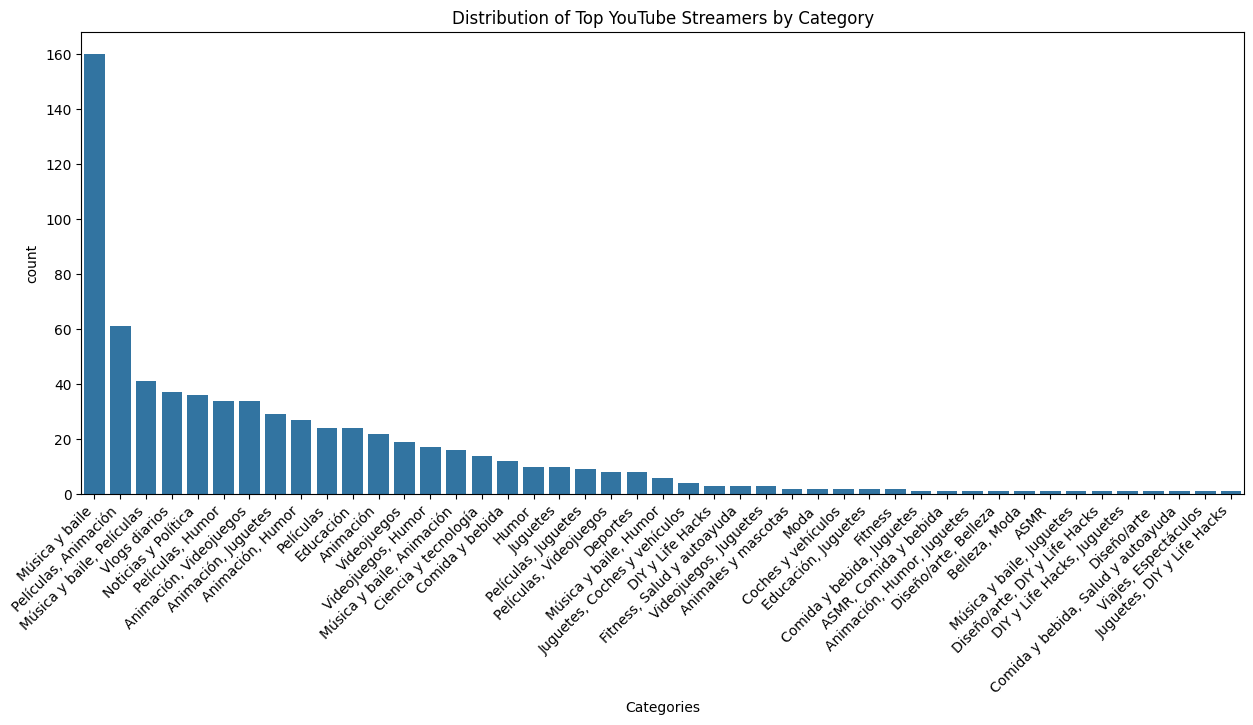

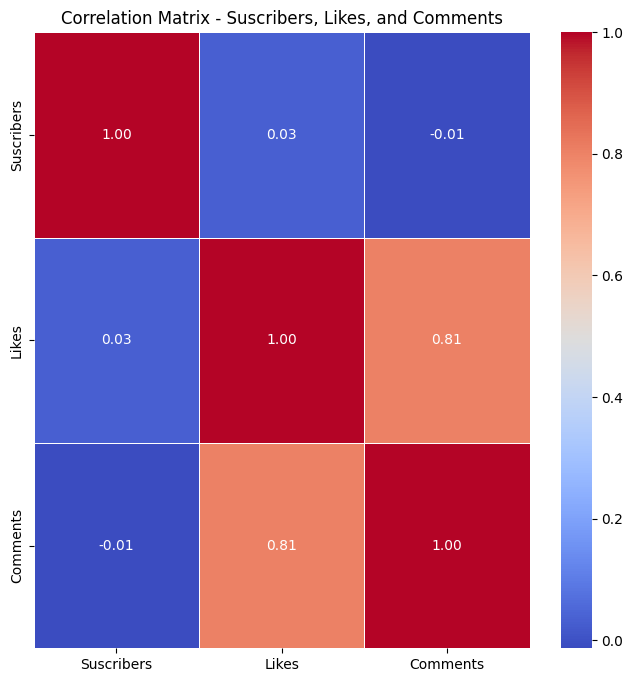

In [22]:
# Category Analysis
plt.figure(figsize=(15, 6))
sns.countplot(x='Categories', data=df, order=df['Categories'].value_counts().index)
plt.title('Distribution of Top YouTube Streamers by Category')
plt.xticks(rotation=45, ha='right')
plt.show()

# Correlation Analysis
correlation_matrix = df[['Suscribers', 'Likes', 'Comments']].corr()

plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix - Suscribers, Likes, and Comments')
plt.show()


### Audience

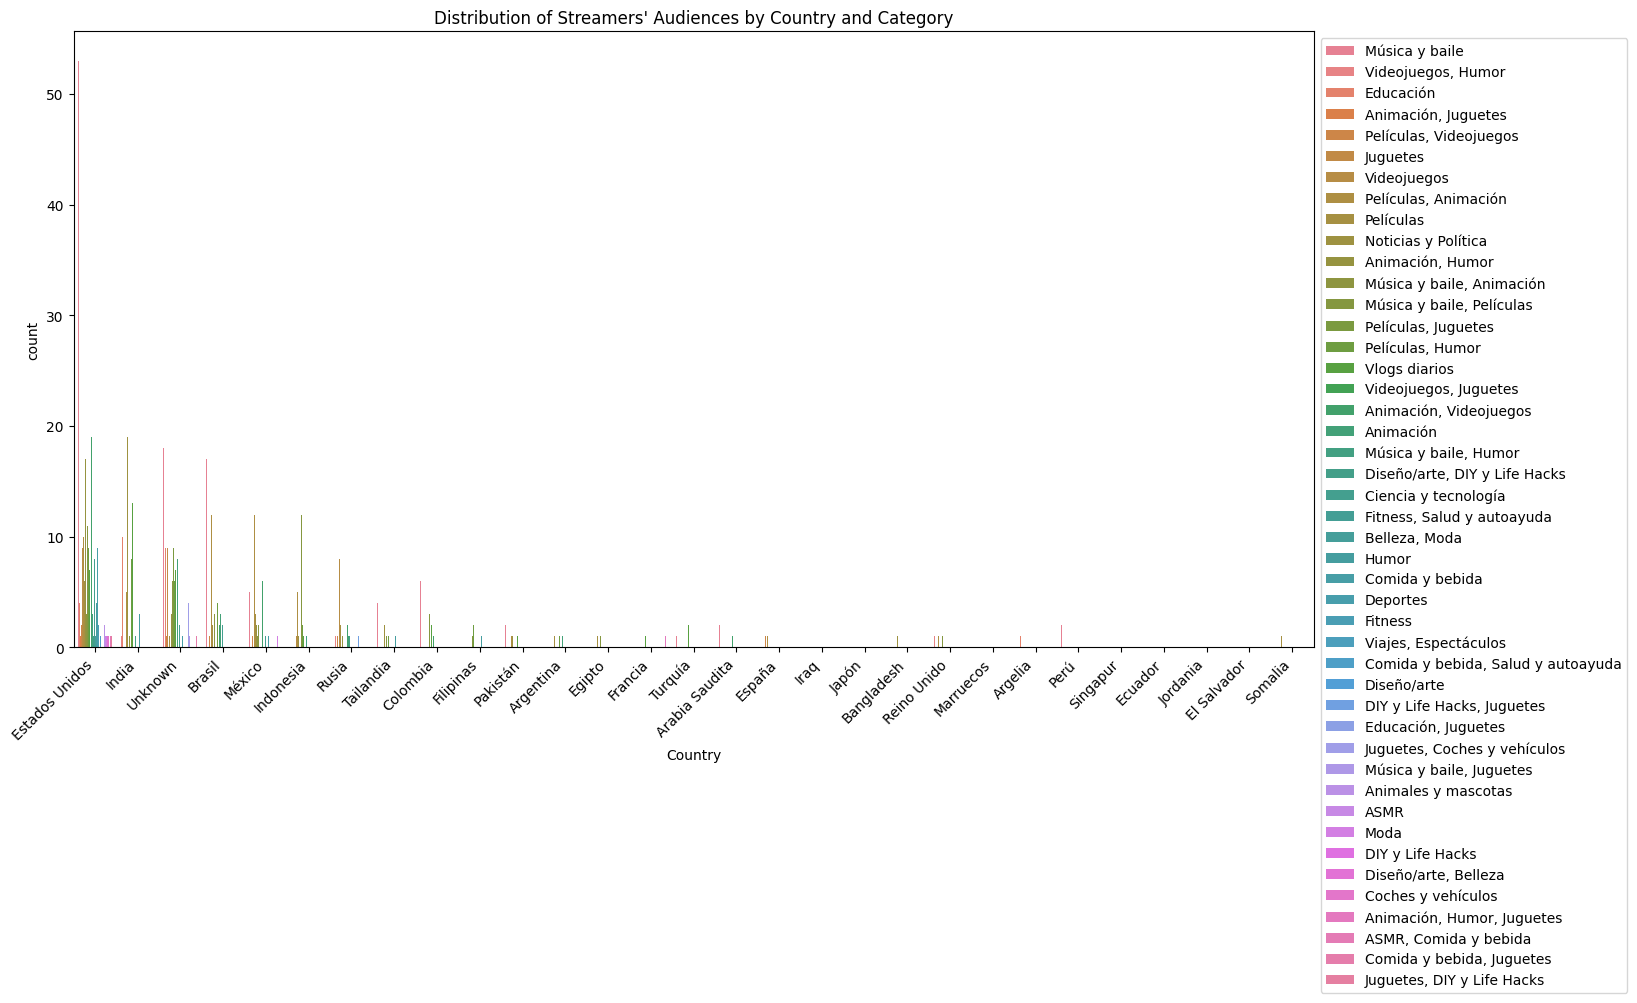

In [30]:
# Audience Study: Distribution of Streamers' Audiences by Country
plt.figure(figsize=(16, 8))
sns.countplot(x='Country', data=df, order=df['Country'].value_counts().index, hue='Categories')
plt.title('Distribution of Streamers\' Audiences by Country and Category')
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')
plt.show()


### Perfomance Metrics

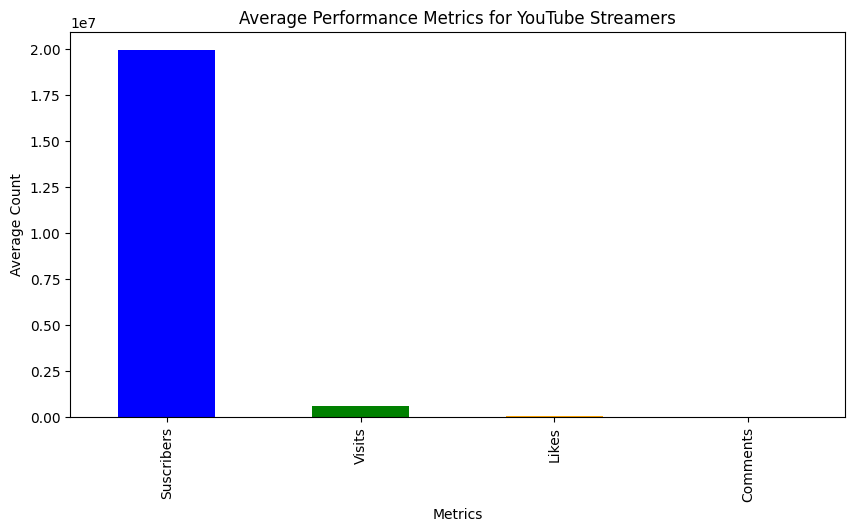

In [46]:
# Performance Metrics: Calculate and Visualize Average Metrics
average_metrics = df[['Suscribers', 'Visits', 'Likes', 'Comments']].mean()

plt.figure(figsize=(10,5))
average_metrics.plot(kind='bar', color=['blue', 'green', 'orange', 'red'])
plt.title('Average Performance Metrics for YouTube Streamers')
plt.ylabel('Average Count')
plt.xlabel('Metrics')
plt.show()

#### Content Categories

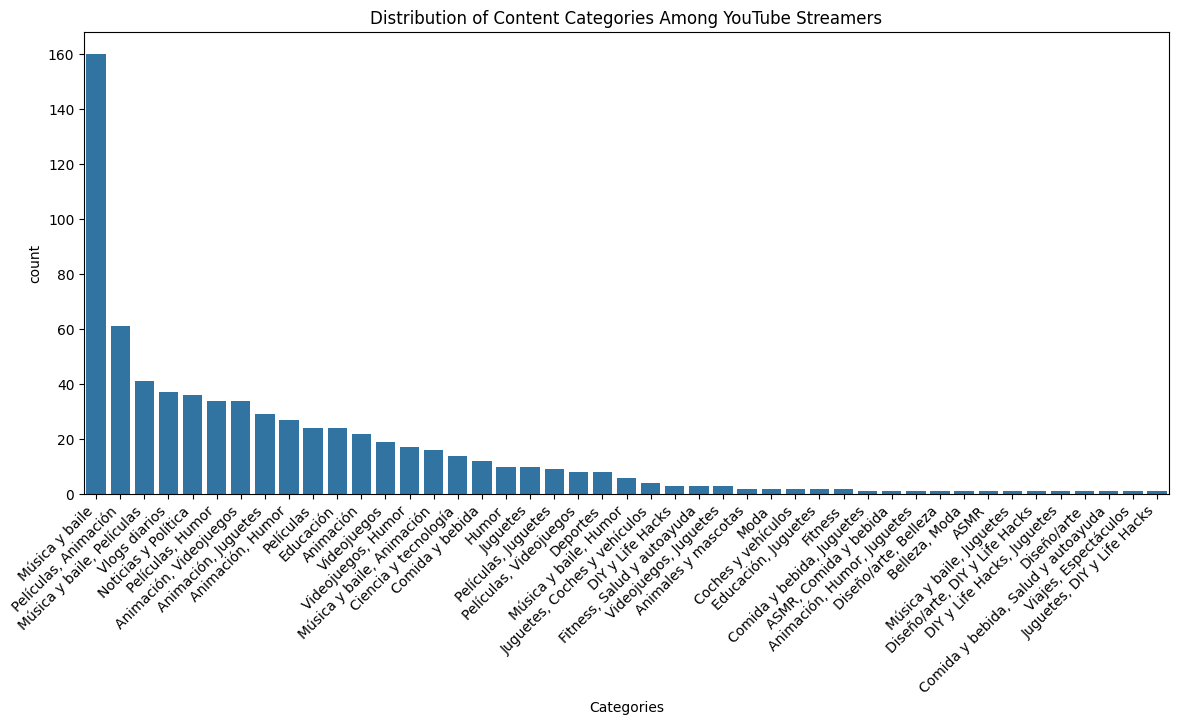

<Figure size 1600x800 with 0 Axes>

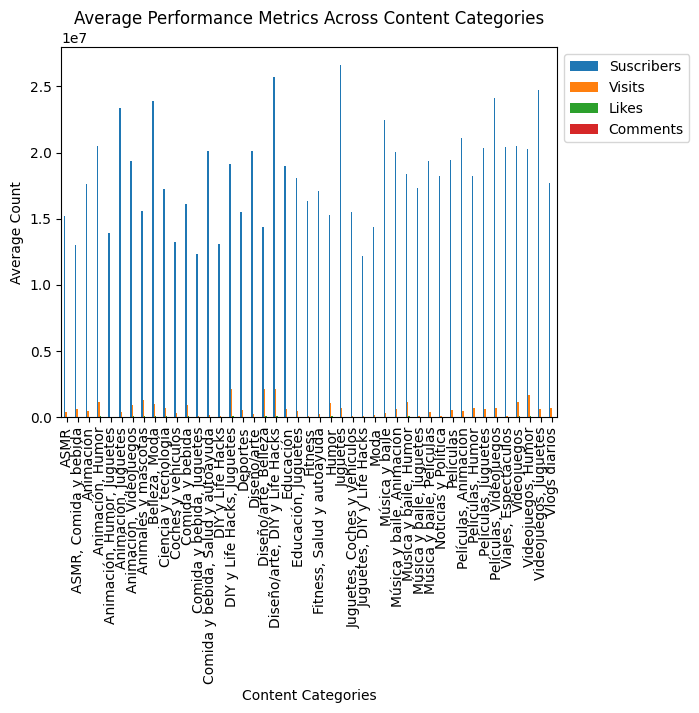

In [37]:
# Explore the distribution of content categories
plt.figure(figsize=(14, 6))
sns.countplot(x='Categories', data=df, order=df['Categories'].value_counts().index)
plt.title('Distribution of Content Categories Among YouTube Streamers')
plt.xticks(rotation=45, ha='right')
plt.show()

# Analyze performance metrics across content categories
performance_by_category = df.groupby('Categories')[['Suscribers', 'Visits', 'Likes', 'Comments']].mean()

plt.figure(figsize=(16, 8))
performance_by_category.plot(kind='bar')
plt.title('Average Performance Metrics Across Content Categories')
plt.ylabel('Average Count')
plt.xlabel('Content Categories')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


### Brands and Colabs

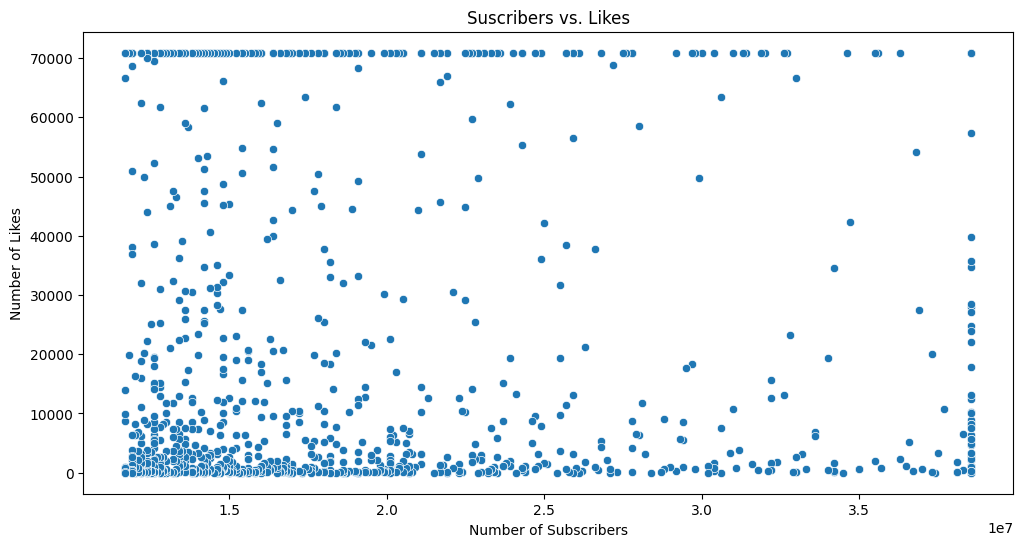

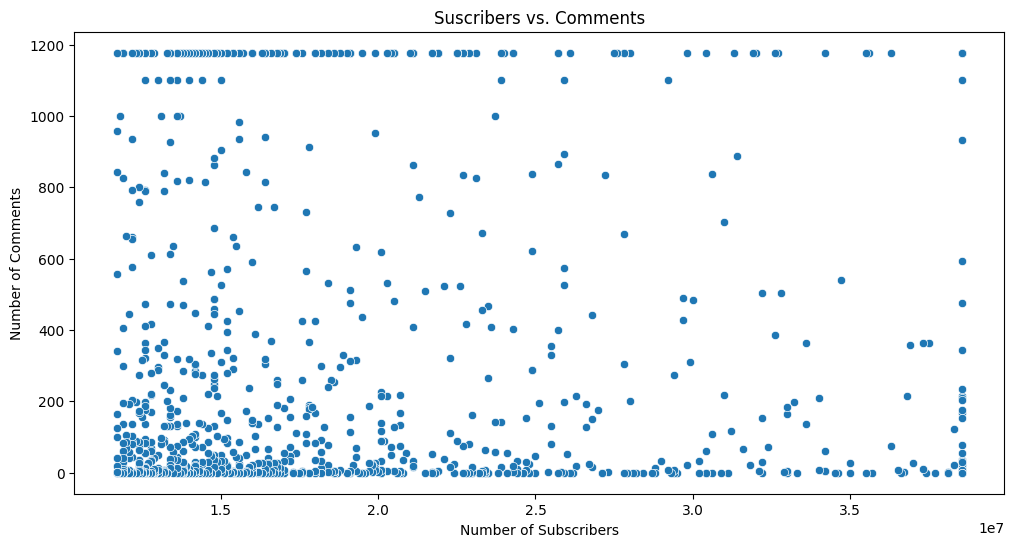

In [40]:
# Brands and Collaborations Analysis
# Scatter plot for Engagement Metrics vs. Subscribers
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Suscribers', y='Likes', data=df)
plt.title('Suscribers vs. Likes')
plt.xlabel('Number of Subscribers')
plt.ylabel('Number of Likes')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Suscribers', y='Comments', data=df)
plt.title('Suscribers vs. Comments')
plt.xlabel('Number of Subscribers')
plt.ylabel('Number of Comments')
plt.show()


### Benchmarking

In [43]:
# Calculate average performance metrics
average_metrics = df[['Suscribers', 'Visits', 'Likes', 'Comments']].mean()

# Identify streamers with above-average performance
above_average_streamers = df[
    (df['Suscribers'] > average_metrics['Suscribers']) &
    (df['Visits'] > average_metrics['Visits']) &
    (df['Likes'] > average_metrics['Likes']) &
    (df['Comments'] > average_metrics['Comments'])
]

# Display information about top-performing content creators
top_performers = above_average_streamers[['Rank', 'Suscribers', 'Visits', 'Likes', 'Comments', 'Categories', 'Country']]
top_performers = top_performers.sort_values(by='Suscribers', ascending=False)

# Display top-performing content creators
print("Top-performing Content Creators:")
print(top_performers)


Top-performing Content Creators:
     Rank  Suscribers     Visits      Likes  Comments            Categories  \
1       2  38550000.0  2115725.0  70917.375    1177.0    Videojuegos, Humor   
43     44  38550000.0  2115725.0  70917.375    1177.0      Animación, Humor   
70     71  38550000.0  1300000.0  70917.375    1177.0  Películas, Animación   
64     65  38550000.0  2115725.0  70917.375    1177.0                   NaN   
62     63  38550000.0  2115725.0  70917.375    1177.0        Música y baile   
..    ...         ...        ...        ...       ...                   ...   
336   337  20500000.0   748400.0  29300.000    1177.0           Videojuegos   
337   338  20500000.0   892800.0  70917.375    1177.0        Música y baile   
338   339  20500000.0  2115725.0  70917.375    1177.0                   NaN   
341   342  20400000.0  2115725.0  70917.375    1177.0                 Humor   
343   344  20300000.0  2115725.0  70917.375    1177.0    Videojuegos, Humor   

            Countr